 <h1><center>Data mining for a working Cas9 variant.</center></h1>



<div style="text-align: right">Lorenzo Federico Signorini, 09/08/2019</div>

<div style="text-align: right">Università degli studi di Trento</div>


In [2]:
# First created Thu Jul 11 09:51:15 CEST 2019
# Made by L-F-S
# At the University Of Trento, Italy

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
from Bio import SeqIO
from IPython.display import display, HTML
sys.path.insert(0, '/home/lorenzo.signorini/cas_mining/utils/')
import filename_discrepancies
from Bio.Alphabet import generic_dna, generic_protein
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import AlignIO
from Bio.Align.Applications import ClustalwCommandline
from Bio.Align import AlignInfo
outpath="/shares/CIBIO-Storage/CM/news/users/lorenzo.signorini/6mining/"
datadir="/shares/CIBIO-Storage/CM/news/users/lorenzo.signorini/"



# 1. Data:
## 1.1 load information about SGBs (species)

In [3]:
SGB_table=pd.read_csv(datadir+"S4Segata.csv", index_col=0)
SGB_table.shape

(4930, 10)

There are 4930 different species (SGBs) in the dataset, Let us print the 20 most abundant ones:

In [4]:
SGB_table.sort_values(by="# Reconstructed genomes", ascending=False).head(20)

,SGB ID,# Reconstructed genomes,# Reference genomes,uSGB,Level of estimated taxonomy,Estimated taxonomy,Average distance from closest Reference Genome,Full taxonomic label of the closest genome,Taxonomic assignment based on 16S rRNA sequences (family level),Taxonomic assignment based on 16S rRNA sequences (genus level)
1490,4933,3457,8,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.025725,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Lachnospiraceae,Lachnospiracea_incertae_sedis
361,1836,2983,20,No,Species,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.017564,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,Bacteroidaceae,Bacteroides
672,2318,2560,2,No,Species,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.014071,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,Rikenellaceae,Alistipes
438,1934,2169,25,No,Species,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.013706,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,Porphyromonadaceae,Parabacteroides
1024,4285,1925,5,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.024487,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Ruminococcaceae,Ruminococcus
339,1814,1844,15,No,Species,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.017179,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,Bacteroidaceae,Bacteroides
4281,15286,1813,0,Yes,Family,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.194245,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Ruminococcaceae,Faecalibacterium
1444,4874,1809,4,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.022680,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Lachnospiraceae,Fusicatenibacter
1181,4540,1634,10,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.022782,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Lachnospiraceae,Anaerostipes
1559,5082,1629,4,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.022264,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Lachnospiraceae,Lachnospiracea_incertae_sedis


## 1.2 load information about Cas9s

In [10]:
cas9dataset=pd.read_csv(datadir+"5caslocitable/known_Cas9_variants_table.csv", index_col=0)
cas9dataset.shape

(33978, 17)

There are 33978 Cas9s in the whole dataset of 154723 genomes.
This dataset was created following step 5, from the original Crisprcas_hits_table.csv. Every line is a different Cas9. Here is information about the sequence, the contig (piece of contiguous DNA in one genome),  other cas features on the same contig, and phylogenetical information, printed out for the first 10 Cas9s:

In [7]:
cas9dataset.head(10)

,Unnamed: 0.1,Seq ID,Seq Description,Seq,Contig,Genome Name,Study,Sample Name,SGB ID,pilercr_CRISPR,minced_CRISPR,prokka_cas1,prokka_cas2,uSGB,Level of estimated taxonomy,Estimated taxonomy
0,0,EIBEGOMO_01279,EIBEGOMO_01279 CRISPR-associated endonuclease ...,MAEEIITDITIFGESKKMLRETLRKKFASCLDDEAIKKLSKLRYRD...,NODE_1073_length_1994_cov_2.17225,AsnicarF_2017__MV_FEI4_t1Q14__bin.1,AsnicarF_2017,MV_FEI4_t1Q14,6939,NaN,NaN,NaN,NaN,No,Species,k__Bacteria|p__Firmicutes|c__Negativicutes|o__...
1,1,KBEGFPIJ_01435,KBEGFPIJ_01435 CRISPR-associated endonuclease ...,MKNIVGLDLGTNSIGWAVVNGSVNDDGSEQLVKIQASGSRIIPMDA...,NODE_45_length_75974_cov_38.2495,AsnicarF_2017__MV_FEI4_t1Q14__bin.4,AsnicarF_2017,MV_FEI4_t1Q14,1814,"[('ID=CRISPR1', '40172', '12')]","[('.', '39283', '40172')]","[('ID=KBEGFPIJ_01437', '37910', '38842')]","[('ID=KBEGFPIJ_01438', '38842', '39180')]",No,Species,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
2,2,OBHKLEMF_00864,OBHKLEMF_00864 CRISPR-associated endonuclease ...,MTKLNQPYGIGLDIGSNSIGFAVVDANSHLLRLKGETAIGARLFRE...,NODE_51_length_94666_cov_13.1517,AsnicarF_2017__MV_FEI4_t2Q15__bin.2,AsnicarF_2017,MV_FEI4_t2Q15,7144,"[('ID=CRISPR1', '23272', '22')]","[('.', '21587', '23272')]","[('ID=OBHKLEMF_00863', '24253', '25158')]","[('ID=OBHKLEMF_00862', '23970', '24275')]",No,Species,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...
3,3,EPJEOPIP_01092,EPJEOPIP_01092 CRISPR-associated endonuclease ...,MGDRKYNLGLDIGTSSIGFAAVDENNQPIRVKGKTAIGVRLFEEGK...,NODE_70_length_82951_cov_19.4828,AsnicarF_2017__MV_FEI4_t2Q15__bin.5,AsnicarF_2017,MV_FEI4_t2Q15,7168,"[('ID=CRISPR1', '24497', '3')]","[('.', '24197', '25552')]","[('ID=EPJEOPIP_01091', '26532', '27437')]","[('ID=EPJEOPIP_01090', '26249', '26554')]",No,Species,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...
4,4,AHBHJMAE_01497,AHBHJMAE_01497 CRISPR-associated endonuclease ...,MGYILGLDIGVASVGYAIIDENYNVLISGVRLFREGTAEENVARRG...,NODE_123_length_29049_cov_29.8501,AsnicarF_2017__MV_FEI5_t1Q14__bin.12,AsnicarF_2017,MV_FEI5_t1Q14,6939,"[('ID=CRISPR1', '13059', '23')]","[('.', '11506', '13060')]","[('ID=AHBHJMAE_01496', '7315', '8232')]","[('ID=AHBHJMAE_01495', '6974', '7318')]",No,Species,k__Bacteria|p__Firmicutes|c__Negativicutes|o__...
5,5,PPJNGKMK_00620,PPJNGKMK_00620 CRISPR-associated endonuclease ...,MGKTHIIGVGLDLGGTYTGTFITSHPSDEAEHRDHSSAFTVVNSEK...,NODE_30_length_116148_cov_68.0265,AsnicarF_2017__MV_FEI5_t2Q14__bin.2,AsnicarF_2017,MV_FEI5_t2Q14,9262,"[('ID=CRISPR1', '29853', '6')]","[('.', '29462', '29925'), ('.', '36897', '3764...","[('ID=PPJNGKMK_00621', '34746', '35738')]","[('ID=PPJNGKMK_00622', '35742', '36029')]",No,Species,k__Bacteria|p__Proteobacteria|c__Betaproteobac...
6,6,AMIFCEHF_02229,AMIFCEHF_02229 CRISPR-associated endonuclease ...,MKTILGLDLGTTSIGWALVKEAEPFSDEKSEIVRLGVRVIPLTVDE...,NODE_175_length_31817_cov_9.16545,AsnicarF_2017__MV_FEM1_t1Q14__bin.6,AsnicarF_2017,MV_FEM1_t1Q14,2230,"[('ID=CRISPR2', '25256', '18')]","[('.', '23902', '25256')]","[('ID=AMIFCEHF_02230', '22548', '23462')]","[('ID=AMIFCEHF_02231', '23495', '23800')]",No,Species,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
7,7,HBHGIHPK_01033,HBHGIHPK_01033 CRISPR-associated endonuclease ...,MKSIYEDLKKEKMVISMAKELHFTSKDMPISDFDRMELKGRIETNP...,NODE_4986_length_3564_cov_6.73668,AsnicarF_2017__MV_FEM2_t1Q14__bin.2,AsnicarF_2017,MV_FEM2_t1Q14,1024,NaN,NaN,NaN,NaN,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
8,8,FBOIKEJM_00490,FBOIKEJM_00490 CRISPR-associated endonuclease ...,MILSTQKYIIDTKGCNMKYKLGLDLGSTSLGWAIVELNEKDTPIRL...,NODE_9_length_125774_cov_10.3523,AsnicarF_2017__MV_FEM2_t1Q14__bin.30,AsnicarF_2017,MV_FEM2_t1Q14,17322,"[('ID=CRISPR1', '113006', '6')]","[('.', '112378', '113006')]","[('ID=FBOIKEJM_00492', '111321', '112217')]","[('ID=FBOIKEJM_00491', '110999', '111337')]",Yes,Other,-
9,9,BNAIOCPL_01158,BNAIOCPL_01158 CRISPR-associated endonuclease ...,MDKKYYIGADIGTESVGWAVTDEDYNILKARGRELWGSYLFDKAES...,NODE_2411_length_6235_cov_4.42071,AsnicarF_2017__MV_FEM2_t1Q14__bin.32,AsnicarF_2017,MV_

## 1.3. Initial Cas9 lengths distribution

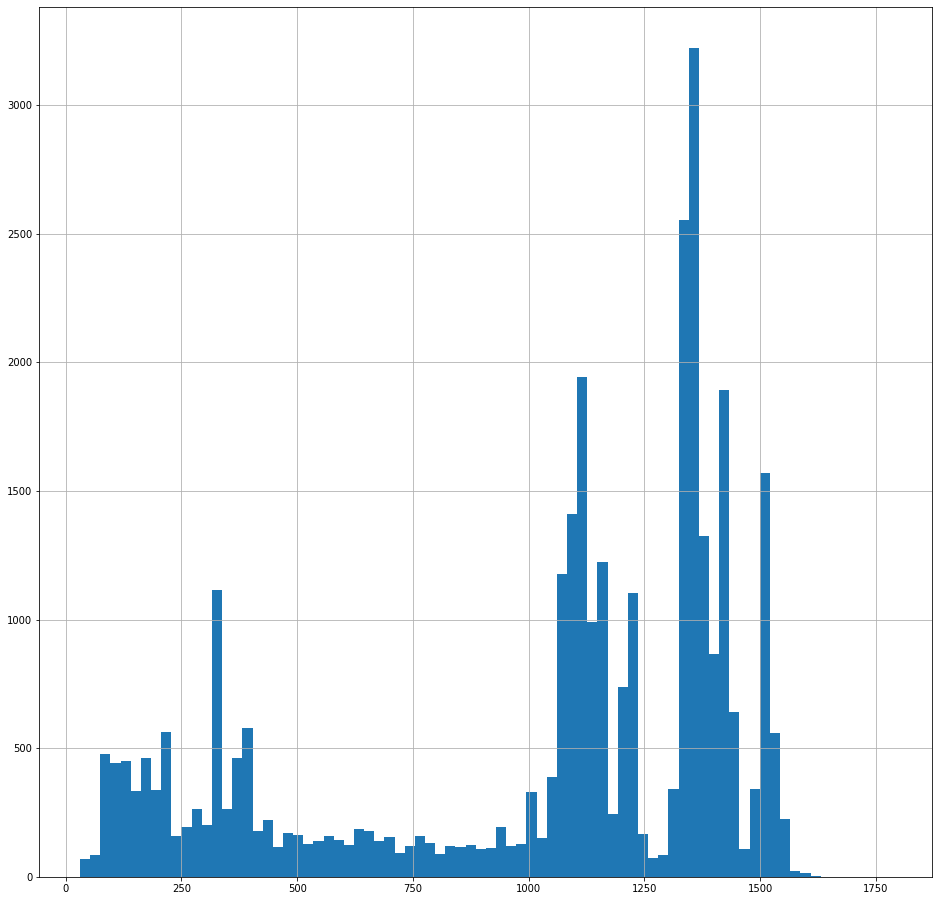

In [7]:
counts=cas9dataset["Seq"].str.count("")
counts.hist(bins=80, figsize=(20*0.8,20*0.8))

In [8]:
counts.max()

1784

# 2. Data filtering: Extract a list of the shortest working cas9 from most abundant and most unknown genomes.

## 2.1 Filter by: active locus
An active locus is defined by having at least 1 CRISPR array, 1 Cas1, 1 Cas2, and 1 effector Cas

In [20]:
#for colname in ["Estimated taxonomy","Level of estimated taxonomy", "SGB ID", 
 #               "Sample Name", "Study", "Genome Name", "Contig", "Seq","Seq Description", 
  #              "Seq ID"]:
   # print(colname, temp[temp[colname]==None].shape)
    #if temp[temp[colname]==None].shape != (0,17):
     #   print("Column", colname, temp[temp[colname]==None].shape)

In [19]:
# Checking that the next step actually does work properly:
# If there are no NaNs values in columns ["Estimated taxonomy","Level of estimated taxonomy", "SGB ID",
#                                            "Sample Name", "Study", "Genome Name", "Contig", "Seq", 
#                                            "Seq Description", "Seq ID"],
# then, it returns True
temp=cas9dataset[cas9dataset.isna().any(axis=1)]  # all rows with at least a Nan
temp[temp["Estimated taxonomy"]==None].shape==temp[temp["Level of estimated taxonomy"]==None].shape==\
temp[temp["uSGB"]==None].shape==temp[temp["SGB ID"]==None].shape==temp[temp["Sample Name"]==None].shape==\
temp[temp["Study"]==None].shape==temp[temp["Genome Name"]==None].shape==temp[temp["Contig"]==None].shape==\
temp[temp["Seq"]==None].shape==temp[temp["Seq Description"]==None].shape==temp[temp["Seq ID"]==None].shape==\
(0,17)

True

In [21]:
#Drop Nan rows
activecas9s=cas9dataset.dropna(how="any")
print(activecas9s.shape)

(18875, 17)


There are 18875 active loci. Let us print the lengths distribution of cas9 in these loci:

## 2.2 Filter by: working active locus
A working locus is defined by being an active locus with a Cas9 of a length falling within the peak of the distribution

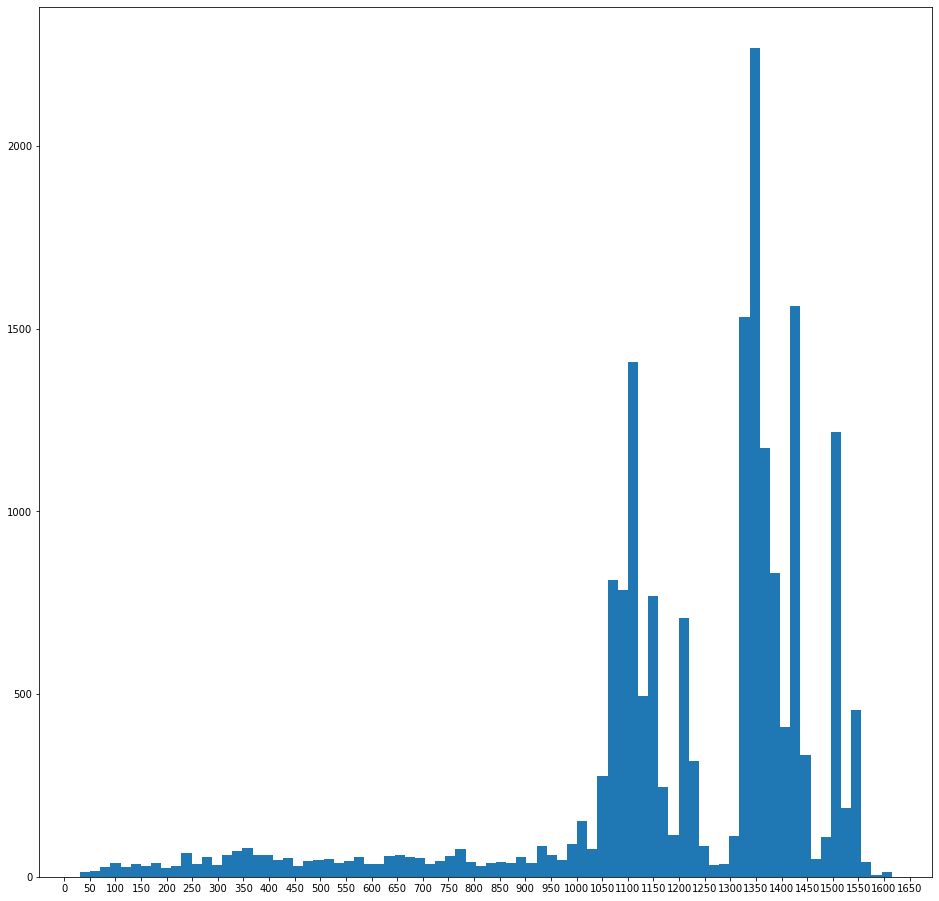

In [22]:
activecas9counts=activecas9s["Seq"].str.count("")
plt.figure(figsize=(20*0.8,20*0.8))
plt.hist(activecas9counts ,bins=80)
plt.xticks(np.arange(0, 1700, step=50))
print()

The length intreval where there seems to be a working protein is around (1050,1170) , (1330,1450) and maybe (1500,1580). We shall define these intrevals as working lengths.

## 2.3-2.4 Filter by: sequence length of 949-1099 amino acid, unknown SGB
An unknown SGB is an SGB with no reference genome in literature.

In [23]:
sorted_activecas9counts=activecas9s["Seq"].str.count("").sort_values()
working_intreval=sorted_activecas9counts[sorted_activecas9counts>=949]
working_intreval=working_intreval[working_intreval<=1099]
active_working_cas9s=activecas9s.loc[working_intreval.index]
active_working_unknwon_cas9s=active_working_cas9s[active_working_cas9s.uSGB=="Yes"]
active_working_unknwon_cas9s.shape

(628, 17)

There are 628 active and working Cas9s from unknown species.

In [24]:
test=active_working_unknwon_cas9s.head(10)

In [31]:
for i, cas9 in test.iterrows():
    cas1start=cas9["prokka_cas1"].split(",")[1].strip(" '")
    cas2start=cas9["prokka_cas2"].split(",")[1].strip(" '")
    if int(cas1start)<int(cas2start):
        print(cas9["Seq ID"], "type II-A, B or C")
    else:
        print(cas9["Seq ID"], "type II-C variant")

NKGLJMBJ_00036 type II-A, B or C
KJDMGLGH_01090 type II-C variant
JJNJAONG_00079 type II-A, B or C
PNKCOBEG_00068 type II-C variant
GCEOGADH_01212 type II-C variant
MOJKMKJH_00496 type II-C variant
HFHGEGGB_01281 type II-C variant
OJFAPCEG_01446 type II-A, B or C
POLOOKHD_01143 type II-A, B or C
FKPPKKCJ_01237 type II-C variant


## 2.5 Filter by: most abundant SGB 

Let us check which SGBs are the most abundant among the Cas loci we have filtered so far.

In [26]:
SGB_abundance_in_dataset=active_working_unknwon_cas9s.groupby(["SGB ID"]).count().sort_values(by="Seq ID", ascending=False)["Seq ID"].head(15)
SGB_abundance_in_dataset=SGB_abundance_in_dataset.rename("# Genomes with act. wrk. cas9")
SGB_rel_ab_in_dataset=pd.DataFrame(SGB_table[SGB_table["SGB ID"].isin(SGB_abundance_in_dataset.index)][["SGB ID","# Reconstructed genomes"]])
SGB_abundance=pd.DataFrame(SGB_abundance_in_dataset).merge(SGB_rel_ab_in_dataset, left_on='SGB ID', right_on='SGB ID')
SGB_abundance["Genomes relative abundance"]=SGB_abundance["# Genomes with act. wrk. cas9"]/SGB_abundance["# Reconstructed genomes"]
SGB_abundance

,SGB ID,# Genomes with act. wrk. cas9,# Reconstructed genomes,Genomes relative abundance
0,9340,105,242,0.433884
1,15299,51,99,0.515152
2,8767,34,71,0.478873
3,15095,22,70,0.314286
4,8769,21,18,1.166667
5,9710,17,28,0.607143
6,9281,17,146,0.116438
7,9311,16,22,0.727273
8,14454,11,83,0.132530
9,9280,10,145,0.068966


All SGBs have a pretty high relative abundance, except for 15286 a, 14454 and 9280. And 8769 does not make any sense.Check that later.

Let us keep all the loci from the SGBs with 10 or more genomes (each one of these genomes contains a working, active cas9 and belongs to the same species), that is, the first 12 SGBs.


But, first, let's check whether all samples are coming from different datasets:

In [27]:
#returns SGBs with samples that only come from one dataset, if any.
for SGB in SGB_abundance_in_dataset.index:
    first_dataset=True
    diff=False
    for ind, Cas9 in active_working_unknwon_cas9s.iterrows():
        if Cas9["SGB ID"]==SGB:
            dataset=Cas9["Genome Name"].split("__")[0]
            if not first_dataset:
                if dataset != temp_unique_dataset:
                    diff=True
            else:
                temp_unique_dataset=dataset
                first_dataset=False
    if not diff:
        print("SGB",SGB,"genomes all come from dataset",dataset)

                

SGB 9710 genomes all come from dataset HMP_2012


This might indicate a certain degree of replication in the data for that dataset.

# 3 Data Clustering
## 3.1 Cluster together identical sequences in the same SGB
for the 12 most abundant unknown SGBs with a working active Cas9s

In [29]:
#trovata cosa ceh non va: dov'è 14454 in questo file?

In [30]:
def seq_getter(s): return str(s.seq)
cons_table_949_1048=""
for SGB in [9340, 15299, 8767, 15095, 8769, 9710, 9281, 9311, 14454, 4329, 8774, 15286]:
    current_SGB=active_working_unknwon_cas9s[active_working_unknwon_cas9s["SGB ID"]==SGB]
    alignments=[]
    for index, row in current_SGB.iterrows():
        tempseq=SeqRecord(Seq(row.Seq), id=str(row["SGB ID"])+"__"+row["Seq ID"]+"__"+row["Genome Name"], description=row["Genome Name"]+"__"+row["Seq ID"]+"__"+str(row["SGB ID"]))
        alignments.append(tempseq)

    filename="SGB"+str(SGB)
    SeqIO.write(alignments, outpath+filename+".faa", "fasta")
    
    fastafile=outpath+filename+".faa"
    records = list(SeqIO.parse(fastafile,'fasta'))    
    records.sort(key=seq_getter)
    n=0
    for seq,equal in groupby(records, seq_getter):
        ids = ';'.join(s.id for s in equal)
        N=ids.count(';')+1
        
        line=">"+ids+"\tlength: "+str(len(seq))+"\t#sequences: "+str(N)+"\n"+seq+"\n"
        cons_table_949_1048+=line
filename2= outpath+"949_1099_aa_Cas9_sequences_from_active_loci_from_12_most_abundant_most_unknown_species_identical"       
f=open(filename2+".faa","w")
f.write(cons_table_949_1048)
f.close()
sequences=list(SeqIO.parse(outpath+"949_1099_aa_Cas9_sequences_from_active_loci_from_12_most_abundant_most_unknown_species_identical.faa",'fasta'))
print("There are", len(sequences),"unique sequences in 12 SGBs")# clusters","("+str(len(without_9710))+" without 9710 SGB) at "+identity_score+" identity.")


There are 204 unique sequences in 12 SGBs


## 3.2 ClustalW multiple sequence alignment

In [101]:
alignments=[]
cline= ClustalwCommandline("clustalw", infile=filename2+".faa", outfile=filename2+".faa.aln")
print(cline)
os.system(str(cline))

clustalw -infile=/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/out/949_1099_aa_Cas9_sequences_from_active_loci_from_12_most_abundant_most_unknown_species_identical.faa -outfile=/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/out/949_1099_aa_Cas9_sequences_from_active_loci_from_12_most_abundant_most_unknown_species_identical.faa.aln


0

## 3.3 Sequences clustering
Cluster together sequences of up to 90% similarity, and extract one representative sequence for each cluster.
Different clustering algorithms are available,the one that works the easiest was fast uclust https://drive5.com/usearch/manual/uclust_algo.html. Uclust performs centroid-based clustering and returns the centroid of each cluster as representative sequence.

```
usearch -cluster_fast 949_1099_aa_Cas9_sequences_from_active_loci_from_12_most_abundant_most_unknown_species_identical.faa -id 0.90 -centroids 9aCsfalf1musi_centroid90.faa -uc clusters.uc

```

uclust output parsing

In [132]:

for identity_score in ["90", "93","95","97", "99"]:
    without_9710, without_8769, without_15286, without_14454, without_9280, without_sketcy_sgbs=[], [],[],[],[],[]
    n_cluster_per_SGB=[]
    for record in SeqIO.parse(outpath+"9aCsfalf1musi_centroid"+identity_score+".faa",'fasta'):
        if not record.id.startswith("9710") or not record.id.startswith("8769") or not record.id.startswith("15286") or not record.id.startswith("14454") or not record.id.startswith("9280"):
            without_sketcy_sgbs.append(SeqRecord(record.seq, id=record.id, description=record.description))
        SGBsnames=[oneid[:6].rstrip("__") for oneid in record.id.split(";")]
        SGBsnames=np.unique(SGBsnames) 
        SGBsnames=";".join(SGBsnames)
        n_cluster_per_SGB.append(SGBsnames)
    print("There are", len(sequences),"sequence clusters","("+str(len(without_sketcy_sgbs))+" without SGBs 9710,8769, 15286,14454, 9280) at "+identity_score+" identity.")
    print("SGB(s)\t# Sequence clusters\n---------------------------")
    print(pd.Series(n_cluster_per_SGB).value_counts(),"\n")


There are 83 sequence clusters (21 without SGBs 9710,8769, 15286,14454, 9280) at 90 identity.
SGB(s)	# Sequence clusters
---------------------------
9311     4
15299    3
8769     2
15286    2
9710     2
9340     2
8767     1
14454    1
4329     1
15095    1
8774     1
9281     1
dtype: int64 

There are 83 sequence clusters (24 without SGBs 9710,8769, 15286,14454, 9280) at 93 identity.
SGB(s)	# Sequence clusters
---------------------------
9311     5
15299    4
15286    3
8769     2
9710     2
9340     2
8767     1
14454    1
4329     1
15095    1
8774     1
9281     1
dtype: int64 

There are 83 sequence clusters (28 without SGBs 9710,8769, 15286,14454, 9280) at 95 identity.
SGB(s)	# Sequence clusters
---------------------------
9311     5
15299    4
15286    3
9710     3
8769     2
14454    2
4329     2
8774     2
9340     2
8767     1
15095    1
9281     1
dtype: int64 

There are 83 sequence clusters (38 without SGBs 9710,8769, 15286,14454, 9280) at 97 identity.
SGB(s)	# Sequence 